# Regresión Simple en Python

### 1. Cargar los datos

In [6]:
#Importo la librería pandas
import pandas as pd

In [7]:
# Importo la libreria pydataset que contiene tablas de datos
import pydataset
# Importo la tabla denominada agefat que incluye información 
# sobre la edad y porcentaje de grasa corporal de una muestra
# de participantes
composition=pydataset.data('agefat')

In [8]:
# Se puede conocer información detallada de la tabla de datos con el siguiente código
pydataset.data('agefat',show_doc=True)

agefat

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

##  Total Body Composision Data

### Description

Age and body fat percentage of 25 normal adults.

### Usage

    data("agefat")

### Format

A data frame with 25 observations on the following 3 variables.

`age`

the age of the subject.

`fat`

the body fat percentage.

`sex`

a factor with levels `female` and `male`.

### Details

The data come from a study investigating a new methods of measuring body
composition (see Mazess et al, 1984), and give the body fat percentage
(percent fat), age and sex for 25 normal adults aged between 23 and 61 years.
The questions of interest are how are age and percent fat related, and is
there any evidence that the relationship is different for males and females.

### Source

R. B. Mazess, W. W. Peppler and M. Gibbons (1984), Total body composition by
dual-photon (153Gd) absorptiometry. _American Journal of Clinical Nutrition_,
**40**, 834–839.

### Exam

### 2. Preparando la tabla de datos

In [9]:
# 2. 1. Identificando las variables en la tabla de datos
composition.head()

,age,fat,sex
1,24,15.5,male
2,37,20.9,male
3,41,18.6,male
4,60,28.0,male
5,31,34.7,female


In [10]:
# 2.2. ELiminando columnas innecesarias
# Las tablas de datos (data frames) tienen el método drop, para eliminar columnas, el argumento 
# columns es igual a una cadena (string) con los nombres de las columnas a eliminar.
composition.drop(columns='sex',inplace=True)
# podemos ver que la columna 'sex'fue eliminada
composition.head()

,age,fat
1,24,15.5
2,37,20.9
3,41,18.6
4,60,28.0
5,31,34.7


In [11]:
# 2.3. Identificando valores perdidos
# El método isna() retorna True si un valor de una columna es igual a na
# En las dos columnas no existen valores perdidos (na)
print('Columna age:')
print(composition.age[composition.age.isna()])
print('Columna fat:')
print(composition.fat[composition.fat.isna()])

Columna age:
Series([], Name: age, dtype: int64)
Columna fat:
Series([], Name: fat, dtype: float64)


Text(0.5, 1.0, 'Boxplot of Fat')

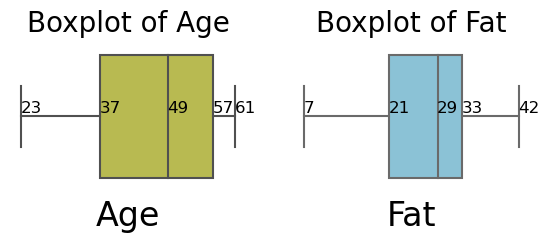

In [31]:
# 2.4. Identificando valores atípicos

# para identificar valores atípicos importaremos las librerias seaborn y matplotlib.pyplot
import seaborn as sns
import matplotlib.pyplot as plt

# Se presentan dos formas de identificar valores atípicos una gráfica y otra estadística

# 2.4.1 Identificando valores atipicos graficamente

# La libreria seaborn ofrece el método boxplot, que devuelve un gráfico de la distribución 
# de los datos incluyendo la mediana, el primer y tercer cuartiles y los bigotes, los cuales 
# son límites superior e inferior, iguales a los valores máximo y mínimo sino hay valores 
# atípicos o valores referenciales para identificar, si hay, valores atípicos. Los valores 
# sobre o debajo de los bigotes son valores atípicos y son representados con puntos.

# Se definen dos sub gráficos, usando la función subplots() 
fig, axes=plt.subplots(1,2,figsize=(6.7,2))

# Grafico dos diagramas de caja, uno para la variable age y otro para la variable fat 
sns.boxplot(x=composition['age'], color='#C9CC3F',ax=axes[0])
sns.boxplot(x=composition['fat'], color='#7EC8E3',ax=axes[1])

# Etiquetas de los ejes
axes[0].set_xlabel('Age', fontsize = 24) 
axes[1].set_xlabel('Fat', fontsize = 24)

# Marcas de los ejes
axes[0].set(xticklabels=[],xticks=[],yticks=[])
axes[1].set(xticklabels=[],xticks=[],yticks=[])

# Remuevo los bordes del gráfico
for i, a in enumerate(axes):
    a.spines["top"].set_visible(False)
    a.spines["right"].set_visible(False)
    a.spines["bottom"].set_visible(False)
    a.spines["left"].set_visible(False)
    
# Agrego texto al diagrama de caja de la variable "age"
axes[0].text(composition.age.min(),-0.03, str(composition.age.min()),size=12)
axes[0].text(composition.age.max(),-0.03, str(composition.age.max()),size=12)
axes[0].text(int(composition.age.median()),-0.03, str(int(composition.age.median())),size=12)
axes[0].text(composition.age.quantile(q=0.25),-0.03, str(int(composition.age.quantile(q=0.25))),size=12)
axes[0].text(composition.age.quantile(q=0.75),-0.03, str(int(composition.age.quantile(q=0.75))),size=12)
axes[0].set_title('Boxplot of Age', size=20)

# Agrego texto al diagrama de caja de la variable "fat"
axes[1].text(composition.fat.min(),-0.03,str(int(composition.fat.min())),size=12)
axes[1].text(composition.fat.max(),-0.03,str(int(composition.fat.max())),size=12)
axes[1].text(int(composition.fat.median()),-0.03,str(int(composition.fat.median())),size=12)
axes[1].text(composition.fat.quantile(q=0.25),-0.03,str(int(composition.fat.quantile(q=0.25))),size=12)
axes[1].text(composition.fat.quantile(q=0.75),-0.03,str(int(composition.fat.quantile(q=0.75))),size=12)
axes[1].set_title('Boxplot of Fat', size=20)
    

Text(0.5, 1.0, 'Histogram of Fat')

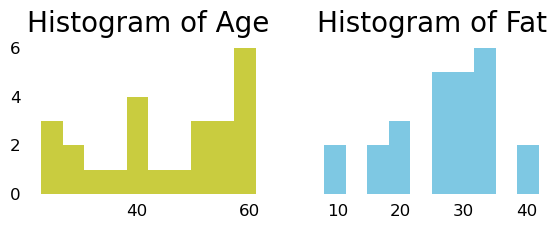

In [32]:
# Histograma

# Defino dos sub gráficos, usando la función subplots()
fig, axes=plt.subplots(1,2,figsize=(6.7,2), sharey=True)

#Grafico dos histogramas, una para la variable age y otro para la variable fat.
axes[0].hist(composition['age'],bins=10, color='#C9CC3F')
axes[1].hist(composition['fat'],bins=10, color='#7EC8E3')

for i, a in enumerate(axes):
    # Remuevo el marco del gráfico
    a.spines["top"].set_visible(False)
    a.spines["right"].set_visible(False)
    a.spines["bottom"].set_visible(False)
    a.spines["left"].set_visible(False)
    # Formato de las marcas de los ejes
    a.tick_params(axis='x',labelsize=12,bottom=False)
    a.tick_params(axis='y',labelsize=12, left=False)
    
# Títulos de los histogramas
axes[0].set_title('Histogram of Age', size=20)
axes[1].set_title('Histogram of Fat', size=20)

In [33]:
#2.4.2 Estadísticamente

# Rango intercuartílico

# El rango intercuartílico - RIC incluye 50% del conjunto de datos 
# que se encuentra en el medio de la distribución. Esta entre el primer 
# y tercer cuartil. Este rango es usado para estimar los valores de 
# referencia inferior y superior. Los valores que caen sobre o debajo 
# de estos valores de referencia son considerados valores atípicos.

# Valores atípicos de la variable "age"
# Estimo los cuartiles
percentile25 = composition['age'].quantile(0.25)
print("Primer cuartil: {}".format(percentile25))
percentile75 = composition['age'].quantile(0.75)
print("Segunto cuartil: {}".format(percentile75))

Primer cuartil: 37.0
Segunto cuartil: 57.0


In [34]:
# Se estima el rango intercuartílico:
iqr=percentile75-percentile25
print("El rango intercuartílico es: {}".format(iqr))

El rango intercuartílico es: 20.0


In [35]:
# Estimo los valores de referencia superior e inferior
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("El valor referencial superior es:{}".format(upper_limit))
print("El valor referencial inferior es:{}".format(lower_limit))

El valor referencial superior es:87.0
El valor referencial inferior es:7.0


In [36]:
# Identifico valores atípicos
print('Age data series outliers above the upper reference value')
print(composition.age[composition['age'] > upper_limit])
print('Age data series outliers below the lower reference value')
print(composition.age[composition['age'] < lower_limit])

Age data series outliers above the upper reference value
Series([], Name: age, dtype: int64)
Age data series outliers below the lower reference value
Series([], Name: age, dtype: int64)


#### Valores atípicos en la tabla de datos

In [37]:
# Estimar los cuartiles
percentile25 = composition['fat'].quantile(0.25)
print("Primer cuartil: {}".format(percentile25))
percentile75 = composition['fat'].quantile(0.75)
print("Segundo cuartil: {}".format(percentile75))

Primer cuartil: 21.3
Segundo cuartil: 33.0


In [38]:
# Estimar el rango intercuartílico
iqr=percentile75-percentile25
print("El rango intercuartílico es: {}".format(iqr))

El rango intercuartílico es: 11.7


In [39]:
# Estimar los valores de referencia superior e inferior.
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("El valor referencial superior es:{}".format(upper_limit))
print("El valor referencial inferior es:{}".format(lower_limit))

El valor referencial superior es:50.55
El valor referencial inferior es:3.7500000000000036


In [40]:
# Identificando los valores atípicos.
print('Fat data series outliers above the upper reference value')
print(composition.fat[composition['fat'] > upper_limit])
print('Fat data series outliers below the lower reference value')
print(composition.fat[composition['fat'] < lower_limit])

Fat data series outliers above the upper reference value
Series([], Name: fat, dtype: float64)
Fat data series outliers below the lower reference value
Series([], Name: fat, dtype: float64)


### 3. Analizando la tabla de datos

In [41]:
# 3.1. Estadística descriptiva

# Para analizar los datos utilizamos la media, desviación estándar, mínimo y máximo.
composition.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
age,25.0,44.96,13.15,23.0,37.0,49.0,57.0,61.0
fat,25.0,27.37,8.68,7.8,21.3,29.1,33.0,42.0


In [42]:
# 3.2. Correlación
# La tabla de datos tiene el método corr() para estimar la matriz de correlación entre las variables.
# La correlación entre las variables es positiva e igual a 0.66
composition.corr().round(2)

,age,fat
age,1.00,0.66
fat,0.66,1.00


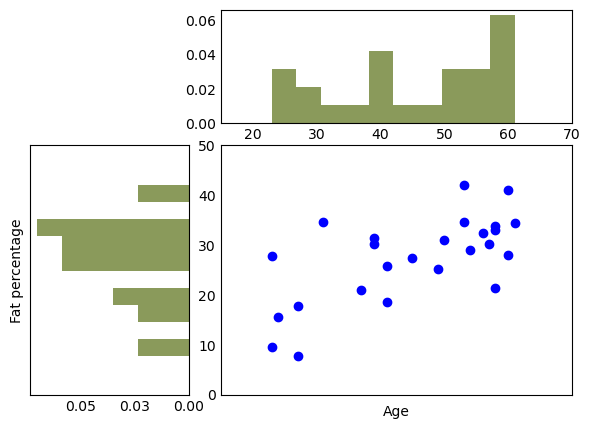

In [43]:
# 3.3. Graficando las variables
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FormatStrFormatter

# Se creará una red de tres gráficos, un gráfico de dispersión y dos histogramas uno para cada variable de la dispersión. 
plt.figure(figsize=(7,5))
gspec = gridspec.GridSpec(3, 3)

# Se definen tres sub gráficos (subplot)
top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

# Los datos son graficados en cada subgrafico.
# Subgráfico inferior a la derecha
lower_right.scatter(composition.age,composition.fat,color='blue')
lower_right.set(xticklabels=[])
lower_right.tick_params(labelsize=10,length=0)
lower_right.set_xlabel('Age',size=10)
# Subgráfico superior
top_histogram.hist(composition.age, bins=10,  density=True,color='#8A9A5B')
top_histogram.tick_params(labelsize=10,length=0)
# Subgráfico inferior a la izquierda
side_histogram.hist(composition.fat, bins=10, orientation='horizontal',  density=True,color='#8A9A5B');
side_histogram.set(yticks=[])
side_histogram.set_ylabel('Fat percentage',size=10)
side_histogram.tick_params(labelsize=10,length=0)
# Se invierte el eje de las x's
side_histogram.invert_xaxis()

# Límites de los ejes
for ax in [top_histogram, lower_right]:
    ax.set_xlim(15, 70)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(0, 50)
for ax in [top_histogram]: 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
for ax in [side_histogram]: 
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

### 4. Estimación de la regresión

In [44]:
from statsmodels.formula. api import ols
# La función ols sirve para estimar una regresión con el método de minimos cuadrados ordinarios.
reg = ols ("fat~age", composition).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fat   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     17.64
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           0.000342
Time:                        22:27:26   Log-Likelihood:                -81.871
No. Observations:                  25   AIC:                             167.7
Df Residuals:                      23   BIC:                             170.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8151      4.843      1.614      0.120      -2.203      17.833
age            0.4349      0.104      4.200      0.000       0.221       0.649
==============================================================================
Omnibus:                        0.195   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.269
Skew:                           0.181   Prob(JB):                        0.874
Kurtosis:                       2.643   Cond. No.                         170.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5. Prueba de heteroscedasticidad

In [45]:
# Prueba de White
# La función het_white realiza la prueba de heteroscedasticidad 
# toma como argumentos los residuos y las variables explicativas.
from statsmodels.stats.diagnostic import het_white
white_test = het_white(reg.resid,  reg.model.exog)
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 2.9757423578048696, 'Test Statistic p-value': 0.22585294464677336, 'F-Statistic': 1.486232429153108, 'F-Test p-value': 0.24806984303103988}


Text(0.5, 1.0, 'Grasa frente a edad \n Gráfico de dispersión')

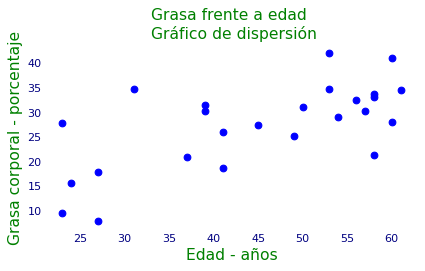

In [46]:
import matplotlib.pyplot as plt
# Gráfico de dispersión para un análisis de la heteroscedasticidad
# Defino la figura
plt.figure(figsize=(6, 3), dpi=80)
# Gráfico la dispersión
plt.scatter(composition.age,composition.fat,color='blue')
ax=plt.gca()

# Describo las etiquetas de los ejes
ax.set_ylabel('Grasa corporal - porcentaje', color='green',size=14)
ax.set_xlabel('Edad - años',color='green',size=14)

# Remuevo los bordes del gráfico 
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
    
ax.tick_params(axis=u'both', which=u'both',length=0,colors='navy',labelsize=10)
# Inserto el título
ax.set_title('Grasa frente a edad \n Gráfico de dispersión',color='green',size=14)

<Figure size 400x300 with 0 Axes>

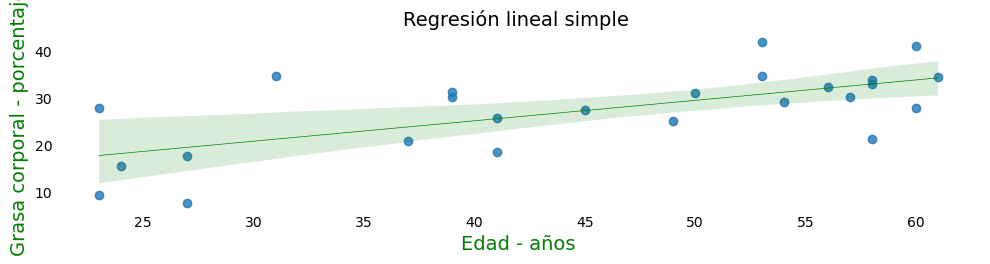

In [47]:
# Graficando la regresión

import seaborn as sns
import matplotlib.pyplot as plt

# Defino la figura
plt.figure(figsize=(4, 3))

# Gráfico la regresión
sns.lmplot (x='age', y='fat', data=composition, 
            fit_reg = True,
            line_kws = {'color': 'green', 
                        'lw': 0.5},
            height=2.5,aspect=4)
# Remuevo los bordes
plt.box(on=None)
# Título
plt.title ('Regresión lineal simple ',
           fontsize=14)
# Etiqueta del eje x
plt.xlabel ('Edad - años',fontsize=14, 
            color='Green')
# Etiqueta del eje y
plt.ylabel ('Grasa corporal - porcentaje',
            fontsize=14,color='Green')

# Marcas de los ejes
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.tick_params(axis=u'both', 
                which=u'both',length=0)
plt.show()

### 6. Pruebas de hipótesis

In [48]:
import numpy as np

In [49]:
reg = ols ("fat~age",composition).fit()
# print(reg.summary())
# Prueba de hipótesis: el coeficiente del intercepto es igual al coeficiente del regresor de la variable age.
f_test=reg.f_test(np.array([1,-1]))
print(f_test)

<F test: F=2.2296176266755827, p=0.14897952709135082, df_denom=23, df_num=1>


In [50]:
# Prueba de hipótesis: el coeficiente del intercepto es igual al coeficiente del regresor de la variable age.
f_test=reg.f_test('Intercept=age')
print(f_test)

<F test: F=2.2296176266755827, p=0.14897952709135082, df_denom=23, df_num=1>


In [51]:
# Prueba de hipótesis: el coeficiente de la variable age es igual a cero.
f_test=reg.f_test('age=0')
print(f_test)

<F test: F=17.639155984461677, p=0.00034212019472290394, df_denom=23, df_num=1>


In [52]:
# Prueba de hipótesis: el coeficiente del intercepto es igual a 10 y el coeficiente de la variable age es igual a 0.
f_test=reg.f_test('(age=0),(Intercept=10)')
print(f_test)

<F test: F=93.57674843849614, p=8.926865139587362e-12, df_denom=23, df_num=2>


In [53]:
# Prueba de hipótesis: el coeficiente del intercepto es igual al coeficiente de la variable age y esta igual a 1.
f_test=reg.f_test('age=Intercept=1')
print(f_test)

<F test: F=112.01584027412287, p=1.390639644501243e-12, df_denom=23, df_num=2>


In [56]:
%load_ext watermark
%watermark -v -m -p pandas,numpy,seaborn,pydataset,matplotlib,watermark,statsmodels
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.10.9
IPython version      : 8.10.0

pandas     : 1.5.3
numpy      : 1.23.5
seaborn    : 0.12.2
pydataset  : 0.2.0
matplotlib : 3.7.0
watermark  : 2.4.2
statsmodels: 0.13.5

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
CPU cores   : 8
Architecture: 64bit

Last updated: Thu Jun 01 2023 22:36:29SA Pacific Standard Time

